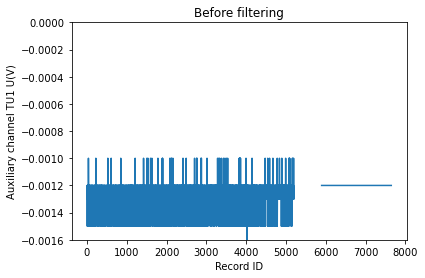

"\nThe output displays the distribution of data from the 'Auxiliary channel TU1 U(V)' column of dataVolDownsampled.csv.\nThe values are highly discrete varying between a small set of negative values ranging from -0.0010 to -0.0016.\nThe fact that we are intending to apply low pass filter on this data indicates that high frequency regions on this plot are noisy.\nSpikes on the plot in quick succession indicate high frequency (noisy) data because the values are changing rapidly relative to x-axis\nRegions which are flat and do not have many spikes are low frequency regions\nIn the next cell, function for filtering is implemented which reduces noisy, i.e., high frequency data and thus the spikes on the plot are also reduced\n"

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal
import cProfile
import pstats
# Function to plot a graph given a one dimensional dataframe and a title


def plot(data, title):
    x = np.linspace(0, len(data), len(data))  # Define range of x-axis
    # Plot the graph with values of dataframe(with single column) on y axis
    plt.plot(x, data)
    plt.ylim([-0.0016, 0])  # Define range of y-axis
    plt.xlabel("Record ID")  # label of x-axis
    plt.ylabel("Auxiliary channel TU1 U(V)")  # label of y-axis
    plt.title(title)  # title of plot
    plt.show()  # display resultant plot
# load csv file into a dataframe
detailVol = pd.read_csv("D:\\Nunam\\Data\\detailVolDownsampled.csv")
# In detailVolDownsampled.csv, the column 'Auxiliary channel TU1 U(V)'
# is the most important numeric observation.
# We try to reduce noise present in it by applying low pass filter
sensor_data = detailVol['Auxiliary channel TU1 U(V)']
prof = cProfile.Profile()  # Initialize a profile object
# Call plot() within run() method of profile object to generate profile report
# it displays the distribution of data before filtering
prof.run('plot(sensor_data,"Before filtering")')
# Write results of profile report to 'output.prof'
prof.dump_stats('C:\\Users\\piyus\\AppData\\Local\\Programs\\Python\\Python38\\output.prof')
# Open text file with append mode so that new report can be written into it
# if profile reports from other functions already exist
stream = open('C:\\Users\\piyus\\AppData\\Local\\Programs\\Python\\Python38\\output.txt', 'a')
# Copy contents(profile report) of output.prof to output.txt
stats = pstats.Stats('C:\\Users\\piyus\\AppData\\Local\\Programs\\Python\\Python38\\output.prof', stream=stream)

"""
The output displays the distribution of data from the 'Auxiliary channel TU1 U(V)' column of dataVolDownsampled.csv.
The values are highly discrete varying between a small set of negative values ranging from -0.0010 to -0.0016.
The fact that we are intending to apply low pass filter on this data indicates that high frequency regions on this plot are noisy.
Spikes on the plot in quick succession indicate high frequency (noisy) data because the values are changing rapidly relative to x-axis
Regions which are flat and do not have many spikes are low frequency regions
In the next cell, function for filtering is implemented which reduces noisy, i.e., high frequency data and thus the spikes on the plot are also reduced
"""


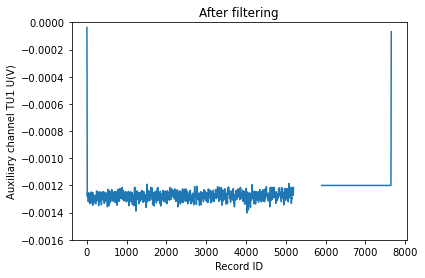

'\nAs can be seen from the plot after filtering the data, spikes withe extreme values have disappeared. This means data values change less often relative to x-axis.\nHence, data with high frequency is eliminated. If we increase window size (which is set to 10 here), an even smoother plot is obtained.\n'

In [2]:
# Function for low pass filtering
# window_size is the width on x-axis for counting
# how many times data changed on y-axis
# (for frequency calculation)


def low_pass(data, window_size):
    # Create and store window in 'w',window type is chosen as triangular
    w = scipy.signal.get_window('triang', window_size)
    # Get the filtered dataframe in 'fil'
    fil = scipy.signal.convolve(data, w/w.sum())
    # Return filtered dataframe
    return fil
prof = cProfile.Profile()  # Initialize a profile object
# Call plot() within run() method of profile object to generate profile report
# it filters data and stores in 'fil' dataframe
prof.run('fil=low_pass(sensor_data,10)')
# Write results of profile report to 'output.prof'
prof.dump_stats('C:\\Users\\piyus\\AppData\\Local\\Programs\\Python\\Python38\\output.prof')
# Open text file with append mode so that new report can be written into it if profile reports
stream = open('C:\\Users\\piyus\\AppData\\Local\\Programs\\Python\\Python38\\output.txt', 'a')
# Copy contents(profile report) of output.prof to output.txt
stats = pstats.Stats('C:\\Users\\piyus\\AppData\\Local\\Programs\\Python\\Python38\\output.prof', stream=stream)
# Display plot after filtering
plot(fil, "After filtering")
"""
As can be seen from the plot after filtering the data, spikes withe extreme values have disappeared. This means data values change less often relative to x-axis.
Hence, data with high frequency is eliminated. If we increase window size (which is set to 10 here), an even smoother plot is obtained.
"""
